In [3]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/kr/2019_down3/2019_down3_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/kr/2019_down3/2019_down3_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/kr/2019_down3/2019_down3_(KR)BlockMedia.csv', error_bad_lines=False))


In [4]:
data.loc[data['main article']=="Provided by Coinness",'main article'] = data.loc[data['main article']=="Provided by Coinness",'abstract']
data.loc[data['main article']=="Provided by 코인니스",'main article'] = data.loc[data['main article']=="Provided by 코인니스",'abstract']
# data.loc[data['main article']=='Provided by 코인니스','abstract']

In [5]:
text = data[['main article']].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)




In [6]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [7]:
text['main article']

0     \n\n\n\n\n지난 7월 NYSE에서 발언하는 켈리 뢰플러 백트 최고경영자(CE...
0     25일 오전 8시 48분 기준 코인마켓캡에 따르면, 비트코인(BTC)은 전날보다 1...
1     뵈르즈 슈투트가르트 디지털 거래소(BSDEX)는 독일은행법의 규제를 받으며, 현재 ...
2     23일 오전 9시 2분 백트의 비트코인 선물 첫 거래가 10,115달러에 성사됐다....
3     암호화폐 전문 미디어 AMBCrypto에 따르면 세계적인 보안 소프트웨어 개발자 존...
4     22일(현지시간) 코인텔레그래프는 보고서를 인용, 올초부터 상위 40개 거래소의 워...
5     암호화폐 전문 미디어 코인데스크에 따르면 익명을 요구한 한 트레이더가 "100배 레...
6     25일(현지시간) 코인텔레그래프 보도에 따르면 바이낸스 거래소는 공식 블로그를 통해...
7     이날 업비트 인도네시아는 공지를 통해 "인도네시아 자카르타 기준 오후 1시에 클레이...
8     암호화폐 전문 미디어 코인데스크에 따르면 암호화폐 데이터 분석 전문 스타트업 스쿠(...
9     Web버전과 App버전, H5버전이 전체적으로 0.1로 업그레이드 된다. 반영된 업...
10    인터뷰 전문보기: https:  kr.coinness.com articles 545...
11    이들 거래소 회원이라면 디파인 컨퍼런스 참가 티켓 30% 할인 혜택을 받을 수 있다...
12    23일(현지시간) 코인데스크 보도에 따르면 스테이블 코인 리브라는 미국 달러 50%...
13    25일 한국블록체인평가는 공식 홈페이지를 오픈하고 법인 출범을 발표했다. 한국블록체...
14    비트소닉은 23일 오후 공지를 통해 "OTP(일회용 비밀번호) 초기화 기록을 중심으...
15    녹스는 자산관리전문가와 헤지펀드를 위해 암호화된 프라이빗키를 오프라인에서 보관하는 ...
16    구로다 하루히코 총재는 오사카에서 열린 한 행사에서 “리브라가 도입되면 사회

In [8]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [9]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [10]:
text['pos tag']

0     [(지난, VV+ETM), (7, SN), (월, NNBC), (NYSE, SL),...
0     [(25, SN), (일, NNBC), (오전, NNG), (8, SN), (시, ...
1     [(뵈, VV+ETM), (르, NNG), (즈, XSN), (슈투트가르트, NNP...
2     [(23, SN), (일, NNBC), (오전, NNG), (9, SN), (시, ...
3     [(암호, NNG), (화폐, NNG), (전문, NNG), (미디어, NNG), ...
4     [(22, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간...
5     [(암호, NNG), (화폐, NNG), (전문, NNG), (미디어, NNG), ...
6     [(25, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간...
7     [(이날, NNG), (업, NNG), (비트, NNG), (인도네시아, NNP),...
8     [(암호, NNG), (화폐, NNG), (전문, NNG), (미디어, NNG), ...
9     [(Web, SL), (버전, NNG), (과, JC), (App, SL), (버전...
10    [(인터뷰, NNG), (전문, NNG), (보, VV), (기, ETN), (:,...
11    [(이, NP), (들, XSN), (거래소, NNG), (회원, NNG), (이,...
12    [(23, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간...
13    [(25, SN), (일, NNBC), (한국, NNP), (블록체인, NNG), ...
14    [(비트, NNG), (소닉, NNG), (은, JX), (23, SN), (일, ...
15    [(녹스, VV), (는, ETM), (자산관리, NNP), (전문가, NNG), ...
16    [(구로다, NNP), (하루히코, NNP), (총재, NNG), (는, J

In [11]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC')])

In [12]:
text['main article']

0     [지난, 월, NYSE, 발언, 하, 는, 켈리, 뢰플러, 백트, 최고경영자, (,...
0     [일, 오전, 시, 분, 기준, 코인, 마켓, 캡, 따르, ,, 비트코인, (, B...
1     [뵈, 르, 즈, 슈투트가르트, 디지털, 거래소, (, BSDEX, ), 독일, 행...
2     [일, 오전, 시, 분, 백트, 의, 비트코인, 선물, 첫, 거래, ,, 달러, 성...
3     [암호, 화폐, 전문, 미디어, AMBCrypto, 따르, 세계, 적, 인, 보안,...
4     [일, (, 현지, 시간, ), 코인, 텔레, 그래프, 보고서, 인용, ,, 올, ...
5     [암호, 화폐, 전문, 미디어, 코인, 데스크, 따르, 익명, 요구, 한, 한, 트...
6     [일, (, 현지, 시간, ), 코인, 텔레, 그래프, 보도, 따르, 바이, 낸스,...
7     [이날, 업, 비트, 인도네시아, 공지, 통해, ", 인도네시아, 자카르타, 기준,...
8     [암호, 화폐, 전문, 미디어, 코인, 데스크, 따르, 암호, 화폐, 데이터, 분석...
9     [Web, 버전, 과, App, 버전, ,, H, 버전, 전체, 적, ., 업그레이...
10    [인터뷰, 전문, 보, 기, :, https, :, kr, ., coinness, ...
11    [이, 들, 거래소, 회원, 이, 디, 파인, 컨퍼런스, 참가, 티켓, %, 할인,...
12    [일, (, 현지, 시간, ), 코인, 데스크, 보도, 따르, 스테이, 블, 코인,...
13    [일, 한국, 블록체인, 평가, 공식, 홈페이지, 오픈, 하, 법인, 출범, 발표,...
14    [비트, 소닉, 일, 오후, 공지, 통해, ", OTP, (, 일회용, 비밀, 번호...
15    [녹스, 는, 자산관리, 전문가, 와, 헤지, 펀드, 위해, 암호, 화, 된, 프라...
16    [구로다, 하루히코, 총재, 오사카, 열린, 한, 행사, “, 리브, 라가,

In [13]:
import csv
stopword_list =[]
f = open('../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [14]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0     [NYSE, 발언, 켈리, 뢰플러, 백트, 최고경영자, CEO, 사진, 트위터, 한...
0     [오전, 기준, 코인, 마켓, 비트코인, BTC, 전날, 하락, 달러, 기록, 비트...
1     [슈투트가르트, 디지털, 거래소, BSDEX, 독일, 행법, 규제, 현재, 비트코인...
2     [오전, 백트, 비트코인, 선물, 거래, 달러, 성사, 이날, 오후, 현재, 거래,...
3     [암호, 화폐, 전문, 미디어, AMBCrypto, 세계, 보안, 소프트웨어, 개발...
4     [현지, 시간, 코인, 텔레, 그래프, 보고서, 인용, 상위, 거래소, 워시, 트레...
5     [암호, 화폐, 전문, 미디어, 코인, 데스크, 익명, 요구, 트레이더, 레버리지,...
6     [현지, 시간, 코인, 텔레, 그래프, 보도, 바이, 낸스, 거래소, 공식, 블로그...
7     [이날, 비트, 인도네시아, 공지, 통해, 인도네시아, 자카르타, 기준, 오후, 클...
8     [암호, 화폐, 전문, 미디어, 코인, 데스크, 암호, 화폐, 데이터, 분석, 전문...
9     [Web, 버전, App, 버전, 버전, 전체, 업그레이드, 반영, 업데이트, bi...
10    [인터뷰, 전문, https, coinness, com, articles, Prov...
11    [거래소, 회원, 파인, 컨퍼런스, 참가, 티켓, 할인, 혜택, 신청, 회원, 추첨...
12    [현지, 시간, 코인, 데스크, 보도, 스테이, 코인, 리브, 미국, 달러, %,,...
13    [한국, 블록체인, 평가, 공식, 홈페이지, 오픈, 법인, 출범, 발표, 한국, 블...
14    [비트, 소닉, 오후, 공지, 통해, OTP, 일회용, 비밀, 번호, 초기, 기록,...
15    [녹스, 자산관리, 전문가, 헤지, 펀드, 위해, 암호, 프라이빗, 키를, 오프라인...
16    [구로다, 하루히코, 총재, 오사카, 열린, 행사, 리브, 라가, 도입, 사

In [15]:
article_contents = tokenized_doc.values.tolist()

In [16]:
len(tokenized_doc)

45

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
# article_contents_tfidf

In [21]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [22]:
word2id = defaultdict(lambda: 0)

In [23]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [24]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [25]:
len(tf_idf_result)

2118

In [26]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

2118


In [27]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [28]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.008*"머리" + 0.008*"변조" + 0.008*"에이치" + 0.008*"OK" + 0.008*"Self" + 0.008*"양사" + 0.008*"저장" + 0.008*"지점"')
(1, '0.012*"베타서비스" + 0.012*"크로스" + 0.012*"Government" + 0.012*"접수" + 0.012*"Decentralized" + 0.012*"바로" + 0.001*"시기" + 0.001*"코빗"')
(2, '0.011*"얼라이언스" + 0.011*"my" + 0.011*"원천" + 0.011*"마이" + 0.011*"앵글" + 0.011*"산재" + 0.011*"추경호" + 0.011*"노하우"')
(3, '0.008*"감추" + 0.008*"불가결" + 0.008*"플러그" + 0.008*"IMAGINE" + 0.008*"주용완" + 0.008*"전개" + 0.008*"테크놀로지" + 0.008*"Identity"')


In [29]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [30]:
sentences = article_contents

In [31]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

6957

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

2118

In [35]:
# model.wv.vocab

In [36]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [37]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [38]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [39]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [40]:
temp_cluster_result['cluster'] = assigned_clusters

In [41]:
temp_cluster_result['raw_data'] = X.tolist()

In [42]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [43]:
from sklearn.metrics import pairwise_distances

In [44]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [45]:
len(cosine_centroid_list)

2118

In [46]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [47]:
sum(temp_distance[3])

2032.388461490175

In [48]:
import scipy.spatial.distance as dist

In [49]:
dist.cosine(X[0],cosine_centroid_list[0])

0.9095583748914886

In [50]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.02908474845545677

In [51]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [52]:
len(tf_idf_value)

2118

In [53]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [54]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
340,"[-0.0006533379200845957, 0.004789814352989197,...",행법,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.636615,0.002857,1.633758,NaN
857,"[-0.00365385040640831, 0.00020234448311384767,...",메르,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.640363,0.002857,1.637506,NaN
560,"[0.0003595446178223938, 0.0019315099343657494,...",했으며,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.654886,0.008572,1.646315,NaN
840,"[-0.0034023933112621307, -0.000769822741858661...",수집,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.662351,0.002857,1.659494,NaN
1802,"[-0.0020340229384601116, -0.001693688333034515...",모여,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.663420,0.002857,1.660562,NaN
442,"[0.000407470331992954, -0.0041765389032661915,...",경쟁사,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.668849,0.005714,1.663134,NaN
938,"[-0.0019191533792763948, 0.0005006732535548508...",최근,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.676159,0.011429,1.664731,NaN
1967,"[-0.0013726494507864118, 0.004480183590203524,...",위원,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.677002,0.002857,1.674145,NaN
1573,"[0.0018233861774206161, 0.0031108814291656017,...",열릴,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.681318,0.002857,1.678461,NaN
1670,"[-0.000184870878001675, 0.004251077771186829, ...",이중과세,0,"[-0.00034580514, 0.0006095719, 0.00012210835, ...",0.685762,0.002857,1.682904,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1157,"[-0.0005400434019975364, 0.0033984174951910973...",Mandelker,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.475421,0.002857,1.472564,NaN
1857,"[0.005332237109541893, -0.0055074868723750114,...",한당,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.623481,0.017143,1.606337,NaN
1548,"[0.0038975649513304234, -0.005181178916245699,...",지표,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.628028,0.011429,1.616599,NaN
223,"[0.0007150901365093887, -0.0067697749473154545...",마켓,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.667199,0.045715,1.621484,NaN
475,"[0.0016064886003732681, -0.0025389580987393856...",장기,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.643531,0.008572,1.634960,NaN
2070,"[-0.0028246957808732986, -0.004180040676146746...",ID,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.645501,0.002857,1.642643,NaN
192,"[-0.0003618090704549104, -0.003976811654865742...",판단,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.672726,0.022858,1.649869,NaN
956,"[0.0038203787989914417, -0.0007105573895387352...",전기,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.663908,0.011429,1.652479,NaN
32,"[0.004801631439477205, 0.002258909633383155, -...",기록,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.698985,0.034286,1.664699,NaN
1232,"[0.005598390009254217, -0.005587196908891201, ...",집중,1,"[0.0010342088, -0.00048030884, -0.00021757951,...",0.690237,0.020000,1.670237,NaN


In [56]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 거래소,돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
61,"[0.0037709802854806185, -0.01349909882992506, ...",블록체인,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.234040,0.377149,0.856891,NaN
13,"[0.0005868520820513368, -0.008655223995447159,...",화폐,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.338742,0.320005,1.018737,NaN
14,"[0.004793236963450909, -0.00485972361639142, 0...",암호,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.416019,0.294291,1.121728,NaN
19,"[0.007033209316432476, -0.00014012960309628397...",거래소,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.341786,0.214289,1.127497,NaN
15,"[0.007264748681336641, -0.01007087528705597, 0...",비트코인,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.408647,0.265719,1.142928,NaN
380,"[-6.534253770951182e-05, -0.004690615460276604...",기술,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.359070,0.137145,1.221925,NaN
222,"[0.0019018397433683276, -0.006274089217185974,...",코인,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.393892,0.154288,1.239604,NaN
227,"[0.0029450596775859594, -0.009490837343037128,...",달러,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.399043,0.142859,1.256184,NaN
52,"[0.004036783706396818, -0.006828371435403824, ...",서비스,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.372321,0.102859,1.269463,NaN
209,"[0.0074919406324625015, 0.00047287624329328537...",가능,2,"[0.0008156371, -0.0012510809, 0.0016530977, -0...",0.357233,0.080001,1.277232,NaN


In [57]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 비즈시도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1891,"[-0.004413738381117582, -0.002681316575035453,...",이외,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.511085,0.002857,1.508228,NaN
968,"[-0.0003799075202550739, -0.005046574864536524...",일회용,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.568380,0.002857,1.565523,NaN
287,"[-0.00033619190799072385, 0.000937811390031129...",Standpoint,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.619560,0.002857,1.616703,NaN
157,"[0.005677164066582918, 0.0013104337267577648, ...",국내,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.677564,0.045715,1.631849,NaN
2079,"[0.0002143189194612205, 0.0014584138989448547,...",사례,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.646787,0.002857,1.643930,NaN
28,"[0.003624421777203679, 0.0010931319557130337, ...",이후,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.677527,0.031429,1.646098,NaN
750,"[0.0017387825064361095, -0.0009419910493306816...",파르나스,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.661016,0.005714,1.655302,NaN
1149,"[0.004442302510142326, -0.00358281540684402, -...",열린,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.664377,0.008572,1.655806,NaN
295,"[-0.0012176461750641465, -0.000464388111140579...",베이스,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.673738,0.011429,1.662309,NaN
2042,"[0.0014762780629098415, -0.0057834661565721035...",영역,3,"[-0.00017775594, -0.00082389754, -0.0004866730...",0.674650,0.011429,1.663221,NaN


In [58]:
y_km = temp_cluster_result['cluster'].values

In [59]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

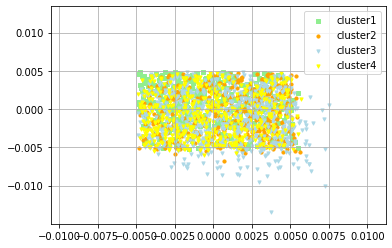

In [60]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 제도

437

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 기타

497

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 거래소,돈

710

In [64]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 비즈시도

474

In [65]:
temp_cluster_result['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [66]:
temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 10 # 제도

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 13 #  기타

In [69]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 12 #  거래소

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈 

In [71]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [73]:
kmeans.inertia_

1.7493864368763836

In [74]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 2 2 ... 2 1 1]


In [75]:
cluster_values= list(model.wv.vocab)

In [76]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.7493864


In [77]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [78]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.009741155


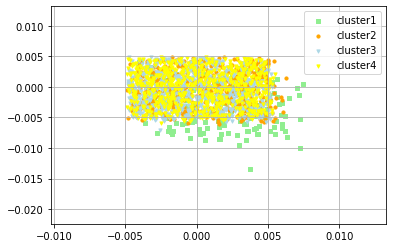

In [79]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [80]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [81]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [82]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [83]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [84]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [85]:
import scipy.spatial.distance as dist

In [86]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [87]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 사회적용

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
61,"[0.0037709802854806185, -0.01349909882992506, ...",블록체인,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.042301,0.377149,0.665152,NaN
13,"[0.0005868520820513368, -0.008655223995447159,...",화폐,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.035528,0.320005,0.715523,NaN
14,"[0.004793236963450909, -0.00485972361639142, 0...",암호,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.030660,0.294291,0.736370,NaN
15,"[0.007264748681336641, -0.01007087528705597, 0...",비트코인,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.034016,0.265719,0.768298,NaN
19,"[0.007033209316432476, -0.00014012960309628397...",거래소,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.031608,0.214289,0.817318,NaN
222,"[0.0019018397433683276, -0.006274089217185974,...",코인,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.030568,0.154288,0.876280,NaN
227,"[0.0029450596775859594, -0.009490837343037128,...",달러,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.029436,0.142859,0.886577,NaN
380,"[-6.534253770951182e-05, -0.004690615460276604...",기술,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.034572,0.137145,0.897427,NaN
172,"[0.005483357701450586, -0.007672671228647232, ...",자산,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.029686,0.128574,0.901113,NaN
69,"[0.004305954556912184, -0.007622480858117342, ...",거래,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.030350,0.122859,0.907490,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
336,"[-0.0012350186007097363, 0.0004597826336976141...",emailprotected,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.031313,0.048572,0.982741,NaN
500,"[-0.0006555934087373316, 0.003296670736745, -0...",현지,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.028055,0.042858,0.985198,NaN
37,"[0.004944721236824989, 0.0005283189238980412, ...",선물,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.030036,0.042858,0.987178,NaN
853,"[0.0010746148182079196, -1.4057088264962658e-0...",정부,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.028985,0.037143,0.991841,NaN
618,"[0.00175193278118968, -0.0003531032707542181, ...",솔루션,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.027664,0.031429,0.996235,NaN
92,"[0.0004554951738100499, 0.00010779513831948861...",기존,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.028389,0.028572,0.999817,NaN
28,"[0.003624421777203679, 0.0010931319557130337, ...",이후,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.031342,0.031429,0.999913,NaN
514,"[0.0014735559234395623, -0.0037042079493403435...",진행,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.029245,0.028572,1.000673,NaN
548,"[-5.407417120295577e-05, -0.001560792094096541...",엑스,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.027122,0.025715,1.001407,NaN
351,"[0.0003912382817361504, 0.0028523788787424564,...",대상,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.027691,0.025715,1.001977,NaN


In [90]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 거래소,돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
505,"[-0.004054626449942589, -0.004164475481957197,...",트레이딩,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.029848,0.037143,0.992704,NaN
675,"[-0.0025485572405159473, -0.007101065944880247...",대해,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.029786,0.034286,0.995499,NaN
504,"[-0.0032711566891521215, 0.0002313567965757101...",워시,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.030020,0.034286,0.995734,NaN
817,"[-0.002870431635528803, 0.0016808505170047283,...",의원,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.029061,0.031429,0.997632,NaN
1673,"[-0.002526099793612957, 0.0023070327006280422,...",blockmedia,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.029881,0.031429,0.998452,NaN
429,"[0.003566846251487732, -0.00570287462323904, -...",여러,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.028566,0.028572,0.999994,NaN
1197,"[-0.0020582834258675575, -0.000919816025998443...",관리,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.026547,0.025715,1.000832,NaN
70,"[-0.0037971462588757277, -0.002959203440696001...",방식,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.027752,0.025715,1.002037,NaN
207,"[-0.0033143034670501947, -0.004386512096971273...",기반,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.027998,0.025715,1.002283,NaN
562,"[0.002510413993149996, -0.004792561288923025, ...",국가,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.028253,0.025715,1.002539,NaN


In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
485,"[-0.002152839442715049, 0.0008954916265793145,...",새로운,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.029431,0.031429,0.998002,NaN
21,"[-0.004072592593729496, 0.0019163389224559069,...",한국,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.028504,0.028572,0.999933,NaN
369,"[-0.0006898728315718472, 0.0003830027126241475...",구축,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.028828,0.028572,1.000256,NaN
16,"[-0.00033411290496587753, -0.00501149380579590...",폭락,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.028066,0.025715,1.002351,NaN
451,"[0.0037995704915374517, 0.002855124184861779, ...",다만,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.026724,0.020000,1.006724,NaN
50,"[-0.002697463845834136, 0.0017993998480960727,...",반응,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.026781,0.020000,1.006781,NaN
798,"[0.0017542883288115263, -0.002818701323121786,...",다양,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.029667,0.022858,1.006809,NaN
23,"[-0.0018916080007329583, 0.002880126005038619,...",오전,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.027418,0.020000,1.007418,NaN
825,"[0.003001202130690217, -0.003643156262114644, ...",통화,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.028106,0.020000,1.008106,NaN
1284,"[-0.0042212605476379395, -0.004625607281923294...",보상,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.028782,0.020000,1.008782,NaN


In [96]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #사회적용

177

In [97]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #제도

615

In [98]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #거래소,돈

660

In [99]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #부정적

666

In [100]:
temp_cluster_result1['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈 

In [102]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 10 # 제도 

In [103]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소,돈

In [104]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 2 # 부정적  

In [105]:
temp_cluster_result1

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#,category,label
0,"[0.0017398121999576688, -0.005115303676575422,...",NYSE,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.029128,0.002857,1.026270,NaN,2,12.0
1,"[0.0031072802376002073, 0.001084682415239513, ...",발언,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.028991,0.008572,1.020420,NaN,2,12.0
2,"[0.004876287188380957, -0.0028307554312050343,...",켈리,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.029997,0.002857,1.027140,NaN,2,12.0
3,"[-0.0037699739914387465, -0.002557791536673903...",뢰플러,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.028718,0.002857,1.025861,NaN,2,10.0
4,"[0.0015834110090509057, -0.006588892079889774,...",백트,0,"[0.0018184923, -0.003118759, 0.0026899823, -0....",0.030946,0.062858,0.968088,NaN,2,7.0
...,...,...,...,...,...,...,...,...,...,...
2113,"[-0.0023300996981561184, 0.0030175584834069014...",조만간,3,"[0.0002093775, -0.000114366994, -0.0001739602,...",0.029906,0.002857,1.027048,NaN,2,2.0
2114,"[0.0007605751743540168, -0.0038433196023106575...",얼라이언스,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.028716,0.002857,1.025859,NaN,2,12.0
2115,"[-0.00034183356910943985, 0.001412105862982571...",Alliance,2,"[-1.5218684e-05, -0.0007022529, 0.00082197005,...",0.029407,0.002857,1.026550,NaN,2,12.0
2116,"[0.0008285606163553894, 0.0025785835459828377,...",Korea,1,"[0.0006609056, -0.00025926877, -2.3624656e-05,...",0.026593,0.002857,1.023736,NaN,2,10.0


In [106]:
temp_cluster_result1['Silhouette'] = 0.009741155
temp_cluster_result['Silhouette'] = 0.009741155

In [112]:
#temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")

In [107]:
len(temp_cluster_result1)

2118

In [108]:
len(temp_cluster_result)

2118

In [109]:
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [111]:
temp_cluster_result1.to_csv("../cluster/ko_news/2019_down3/ko_news_2019_down3_euclidean.csv")
temp_cluster_result.to_csv("../cluster/ko_news/2019_down3/ko_news_2019_down3_cosine.csv")